# Introducción al Análisis del Marketing 

## Importancia
- Conocimiento del cliente
- Optimiza el retorno de la Inversión
- Personaliza la experiencia
- Efectividad de las campañas

## Términos claves
- Funnel de conversión
- Segmentación del mercado
- Customer lifetime Value (CLV)
- Retención y Churn

## Ejemplos 
- Personalizar las campañas
- Optimizar los presupuestos publcitarios
- Efectividad de las campañas


# Métricas clave de marketing
 ## 1.- KPI's de Adquisición (Enfocado a atraer nuevos clientes)
   - ### CAC (Costo de adquision del cliente)
  $$
  \text{CAC} = \frac{\text{Total \, invertido \, en \, marketing \, y \, ventas}}{\text{Número \, de \, nuevos \, clientes \, adquiridos}}
  $$
  - ### CTR (Clicks por impresiones, relevancia y atractivo de los anuncios)
  $$
  \text{CTR} (\%)= \frac{\text{Clicks \, en \, el \, anuncio}}{\text{Impresiones \, totales}} \times 100
  $$
  - ### CPC (Costo por Click)
  $$
  \text{CPC} = \frac{\text{Costo \, total \, de \, la \, campaña}}{\text{Número \, de \, clicks}} \times 100
  $$

  ## 2.- KPI's de Conversión (Miden el rendimiento de las ventas y acciones clave)

  - ### Tasa de conversión 
  $$
  \text{Tasa \, de \, conversión} (\%) = \frac{\text{Número \, de \, conversiones }}{\text{Número \, de \,visitantes \,únicos}} \times 100
  $$

  - ### ROAS 
    (Return on Advertising Spend, por sus siglas en inglés) es una métrica clave en marketing digital que mide la eficiencia de una campaña publicitaria en términos de ingresos generados en comparación con el gasto publicitario.
  $$
  \text{ROAS} = \frac{\text{Ingresos Generados por la Campaña}}{\text{Gasto en Publicidad}}
  $$

  ## 3.- KPI's Retención ( Comportamiento de los clientes ya existentes)ç

  - ### Tasa de Churn (Abandono)
  $$
  \text{Churn Rate} (\%)= \frac{\text{Clientes perdidos en un período}}{\text{Clientes totales al inicio del período}} \times 100
  $$

  - ### Tasa de Retención (Mantener al cliente)
  $$
  \text{Tasa de retención} (\%) = {\text{100}}-{\text{Tasa de Churn (\%)}} \times 100
  $$

  - ### CLV (Customer Lifetime Value)
  $$
  \text{CLV} = \text{Ingreso Promedio por Cliente} \times \text{Frecuencia de Compra} \times \text{Duración de la Relación (en años)}
  $$


# Métricas as generar
- CTR
- CPC
- CPM ( Costo por mil)
- CPE (Costo por engagement)
- Costo por conversión
- Converision_Value
- Engagement_Rate
- impresión por Dolar
- Éxito de la campaña
- CLV (Impresiones, no clientes)

In [35]:
import pandas as pd
import numpy as np   
# Estaqblecer la visualizacion de todas las columnas
pd.set_option('display.max_columns', None)
# Establecer el formato para números de punto flotante
pd.options.display.float_format = lambda x: '%.4f' % x
# Paquetes d visualización
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
sys.path.append('..')
from src import soporte_analisis as spa
from src import sp_visualizacin as spv
from src import sp_eda as spe
from src import sp_nulos as spn


In [29]:
df= pd.read_csv('../data/nulos_numericas_limpios.csv', parse_dates=['date'])

In [30]:
df.head()

,campaign_id,company,campaign_type,channel_used,conversion_rate,location,language,customer_segment,date,total($),genre,ages,year,month,day_name,quarter,duration_knn,roi_knn,clicks_knn,impressions_knn,engagement_score_knn
0,1,innovate industries,unknow,google ads,0.0404,chicago,spanish,health & wellness,2021-01-01,16174.0000,men,18-24,2021.0000,1.0000,friday,1.0000,30.0000,6.2900,267276.2000,19221922.0000,66.0000
1,2,nexgen systems,email,google ads,0.1212,new york,german,fashionistas,2021-01-02,11566.0000,women,35-44,2021.0000,1.0000,saturday,1.0000,60.0000,5.6100,116.0000,7523.0000,7.0000
2,3,alpha innovations,influencer,youtube,0.0707,los angeles,french,outdoor adventurers,2021-01-03,10200.0000,men,25-34,2021.0000,1.0000,sunday,1.0000,30.0000,7.1800,193442.4000,7698.0000,11.0000
3,4,unknow,display,youtube,0.1111,miami,mandarin,health & wellness,2021-01-04,12724.0000,unknow,all_ages,2021.0000,1.0000,monday,1.0000,60.0000,27.0926,217.0000,57782200.6000,7.0000
4,5,nexgen systems,email,youtube,0.0505,los angeles,unknow,health & wellness,2021-01-05,16452.0000,men,25-34,2021.0000,1.0000,tuesday,1.0000,15.0000,66.5500,379379.0000,4201.0000,33.0000


In [31]:
df['CTR'] = df['clicks_knn'] / df['impressions_knn'] 
df['CPC'] = df['total($)'] / df['clicks_knn']
df['CPM'] = df['total($)'] / df['impressions_knn'] * 1000
df['CPE'] = df['total($)'] / df['engagement_score_knn']
df['conversion_cost']= df['total($)'] / df['conversion_rate']
df['conversion_value'] = df['conversion_rate'] * df['roi_knn']
df['engagement_rate'] = df['engagement_score_knn'] / df ['impressions_knn']
df['impressions_per_$'] = df['impressions_knn'] / df['total($)']
df['is_succesfull'] = df['roi_knn'].apply(lambda x: 1 if x > 5 else 0)
df['CLV'] = df['roi_knn'] * df['conversion_rate'] * df['impressions_knn']

In [32]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'channel_used',
       'conversion_rate', 'location', 'language', 'customer_segment', 'date',
       'total($)', 'genre', 'ages', 'year', 'month', 'day_name', 'quarter',
       'duration_knn', 'roi_knn', 'clicks_knn', 'impressions_knn',
       'engagement_score_knn', 'CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV'],
      dtype='object')

In [33]:
df_metricas= df[['CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV']]

In [34]:
df_metricas.describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,209915.0000,31.6704,82.0610,0.0000,0.0019,0.0203,14.8096,991.0398
CPC,209915.0000,13.7620,23.6579,0.0050,0.0243,0.0744,20.0158,199.6100
CPM,209915.0000,1441.8150,2406.2681,0.0501,0.2295,0.7390,2090.8449,19896.1039
CPE,209915.0000,1826.6933,2984.1863,4.9525,198.4014,714.2353,2073.1806,20000.0000
conversion_cost,209915.0000,242384.5703,262389.6238,33062.7063,102503.5361,154720.2274,266351.9566,2000000.0000
conversion_value,209915.0000,2.2329,2.4520,0.0200,0.4038,1.1044,3.3587,13.3320
engagement_rate,209915.0000,0.0091,0.0465,0.0000,0.0000,0.0000,0.0027,1.0080
impressions_per_$,209915.0000,2597.6372,3334.6177,0.0503,0.4783,1353.0904,4358.0375,19946.0950
is_succesfull,209915.0000,0.7917,0.4061,0.0000,1.0000,1.0000,1.0000,1.0000
CLV,209915.0000,62701161.0050,125481445.7112,25.3422,6844.3301,6352670.0802,60310253.4223,1164259229.5695


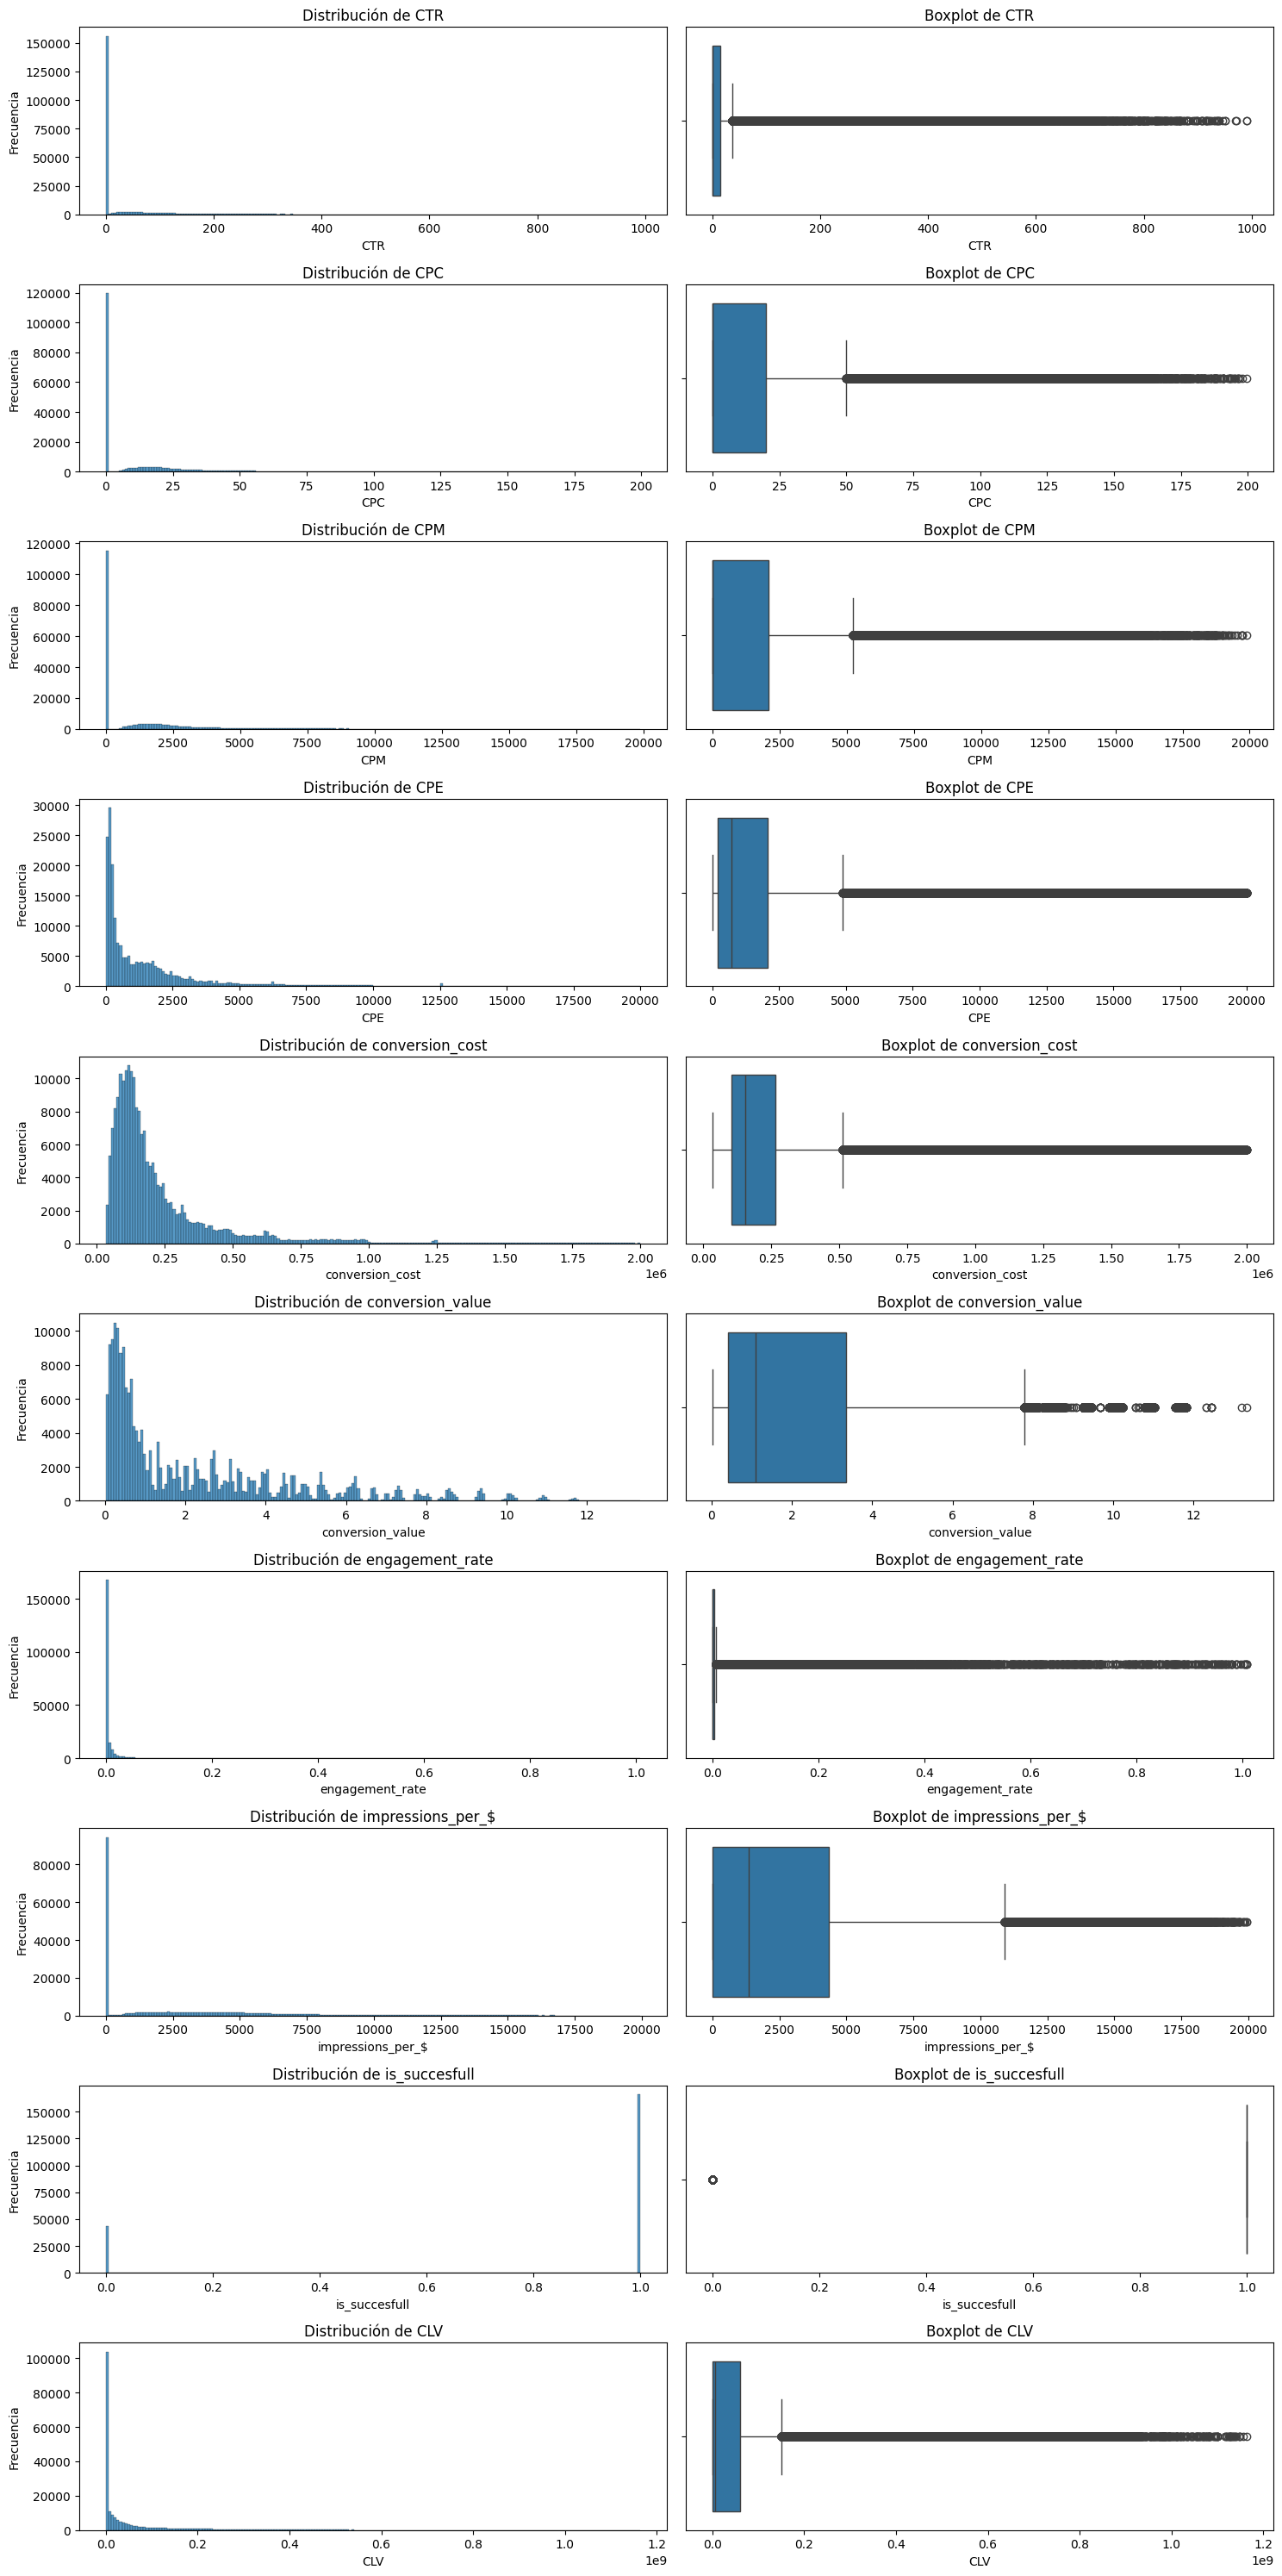

In [36]:
spv.subplot_col_num(df_metricas, df_metricas.columns)